# **Lecture 3: Transformers Beyond Text – Vision and Multimodal AI**

## **Introduction**
While Transformers initially revolutionized natural language processing (NLP), their applications have extended beyond text into computer vision (CV) and multimodal AI. Unlike traditional convolutional neural networks (CNNs), which operate on spatial hierarchies, Vision Transformers (ViTs) treat images as sequential data, processing them with self-attention mechanisms. Furthermore, multimodal AI models like CLIP, DALL·E, and Stable Diffusion enable seamless integration of multiple data types, such as text, images, and audio.

### **This lecture covers:**
- **Vision Transformers (ViTs)** – Applying Transformers to image classification and object detection.
- **Multimodal AI** – Combining text, images, and other modalities for enhanced AI capabilities.

---

## **1. Vision Transformers (ViTs)**

### **How Transformers Work for Images**
Traditional CNNs process images by extracting hierarchical spatial features through convolutional layers. In contrast, ViTs split images into patches, each treated as a sequence token, and apply self-attention to model global dependencies.

### **Key Steps in ViT Processing:**
1. **Image Tokenization** – The image is divided into fixed-size patches (e.g., 16×16 pixels).
2. **Patch Embeddings** – Each patch is flattened and mapped into a high-dimensional space.
3. **Positional Encoding** – Since Transformers lack inherent spatial structure, positional encodings are added.
4. **Self-Attention** – The model learns relationships between patches using multi-head self-attention.
5. **Classification Head** – A special `[CLS]` token is used to aggregate image features and classify the image.

### **ViT vs. CNNs**
| Feature               | CNNs (Convolutional Neural Networks) | ViTs (Vision Transformers) |
|----------------------|----------------------------------|-------------------------|
| **Feature Extraction** | Local (convolutional filters)   | Global (self-attention) |
| **Computation**      | Efficient for small datasets    | Requires large datasets |
| **Scalability**      | Limited due to locality         | Scales well with larger models |

### **Example: Using a Pretrained ViT for Image Classification**




In [3]:
import torch
from transformers import ViTForImageClassification, ViTImageProcessor
from PIL import Image
import requests

# Load a pretrained Vision Transformer
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

# Load an image from a URL
url = "http://images.cocodataset.org/val2017/000000439715.jpg"
response = requests.get(url, stream=True)
image = Image.open(response.raw)

# Process the image and prepare it for the model
inputs = processor(images=image, return_tensors="pt")

# Forward pass through the model
outputs = model(**inputs)

# Get the predicted class
predicted_class_idx = outputs.logits.argmax(-1).item()
predicted_class_label = model.config.id2label[predicted_class_idx]

print(f"Predicted Class: {predicted_class_label}")

Predicted Class: bearskin, busby, shako


### **Advanced Vision Transformers**
Beyond ViT, several specialized models have been developed:
- **DETR (Detection Transformer)** – Uses cross-attention for object detection.
- **Swin Transformer** – Introduces hierarchical patch embeddings for better efficiency.
- **ImageGPT** – Autoregressively generates images pixel-by-pixel, similar to GPT in NLP.

---

## **2. Multimodal AI – Combining Text, Images, and More**

### **What is Multimodal AI?**
Multimodal AI refers to models that process and generate multiple types of data, such as text, images, and audio. Unlike single-modality AI (e.g., NLP-only or vision-only models), multimodal AI enhances understanding by leveraging cross-modal learning.

### **Key Multimodal Transformer Models**

#### **CLIP (Contrastive Language-Image Pretraining)**
Developed by OpenAI, CLIP is trained on (image, text) pairs to learn joint embeddings of images and textual descriptions. It enables:
- **Zero-shot image classification** (e.g., "find an image of a dog").
- **Image-to-text retrieval and vice versa**.
- **Semantic search**, where users can query images with natural language.

#### **Example: Using CLIP for Image Classification**



In [6]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import requests
from io import BytesIO

# Load CLIP model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Define text prompts
text_inputs = processor(text=["a cat", "a dog"], return_tensors="pt", padding=True)

# Load image from URL
url = "http://images.cocodataset.org/val2017/000000439715.jpg"  # Example image URL
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Process image
image_inputs = processor(images=image, return_tensors="pt")

# Compute similarity
# CLIP processes text and images in separate forward passes
with torch.no_grad():
    image_features = model.get_image_features(**image_inputs)
    text_features = model.get_text_features(**text_inputs)

# Calculate similarity scores
image_features = image_features / image_features.norm(dim=-1, keepdim=True)
text_features = text_features / text_features.norm(dim=-1, keepdim=True)
similarity = torch.matmul(image_features, text_features.T)

# Convert to probabilities
probs = torch.nn.functional.softmax(similarity * 100, dim=-1)

print("Probabilities:", probs)
# Print the most likely class
if probs[0][0] > probs[0][1]:
    print("This image is most likely a cat")
else:
    print("This image is most likely a dog")

# Optional: Display the image if in a notebook
# from IPython.display import display
# display(image)

Probabilities: tensor([[0.3205, 0.6795]])
This image is most likely a dog


### **DALL·E – Text-to-Image Generation**
DALL·E models use diffusion transformers to generate images from text descriptions. These models create high-quality, AI-generated artwork based on text input.

#### **Example: Generating an Image with DALL·E**


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:  62%|######1   | 2.12G/3.44G [00:00<?, ?B/s]

C:\Users\physi\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\physi\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

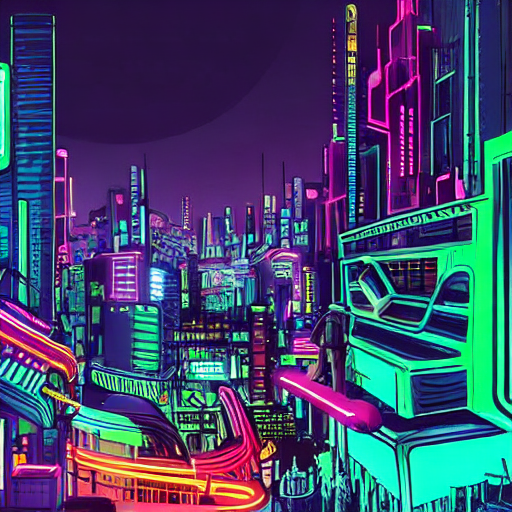

In [1]:
from diffusers import DiffusionPipeline
import torch
from PIL import Image

# Load a Stable Diffusion pipeline
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipeline = pipeline.to("cuda" if torch.cuda.is_available() else "cpu")

# Generate the image
prompt = "A futuristic cityscape in neon lights"
image = pipeline(prompt).images[0]

# Save the image
image.save("generated_image.png")

# Display the image
display(image)  # This works in Jupyter notebooks/Colab

---

### **Stable Diffusion – Open-Source Image Generation**
Stable Diffusion is a text-to-image model that generates high-resolution images from textual descriptions using latent diffusion models (LDMs). Unlike DALL·E, Stable Diffusion can run locally on GPUs, making it more accessible.

---

## **Conclusion**
Transformers have transcended beyond text-based applications, powering breakthroughs in computer vision and multimodal AI. Models like Vision Transformers (ViTs), CLIP, DALL·E, and Stable Diffusion demonstrate the potential of self-attention across various domains. By leveraging large-scale training and multi-modal integration, AI systems continue to push the boundaries of creativity and automation.